In [23]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

# Transform: normalize and convert to tensor
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load MNIST
mnist_train = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
mnist_test = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Split training into training and validation
train_size = int(0.8 * len(mnist_train))
val_size = len(mnist_train) - train_size
train_data, val_data = random_split(mnist_train, [train_size, val_size])

# DataLoaders
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
val_loader = DataLoader(val_data, batch_size=64, shuffle=False)
test_loader = DataLoader(mnist_test, batch_size=64, shuffle=False)


In [24]:
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # Define layers
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3)  # No activation here
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)  # No activation here
        self.pool2 = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 5 * 5, 128)  # Flattened size after convolutions
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 10)  # Output layer for 10 classes

    def forward(self, x):
        x = F.relu(self.conv1(x))  # Apply ReLU after conv1
        x = self.pool1(x)
        x = F.relu(self.conv2(x))  # Apply ReLU after conv2
        x = self.pool2(x)
        x = x.view(-1, 64 * 5 * 5)  # Flatten
        x = F.relu(self.fc1(x))  # Apply ReLU after fc1
        x = self.dropout(x)
        x = self.fc2(x)  # No activation on the output layer (handled by loss function)
        return F.log_softmax(x, dim=1)  # Log-Softmax for classification


Epoch 1/20 - Train Loss: 0.2747, Val Loss: 0.0670
Epoch 2/20 - Train Loss: 0.1005, Val Loss: 0.0528
Epoch 3/20 - Train Loss: 0.0757, Val Loss: 0.0475
Epoch 4/20 - Train Loss: 0.0623, Val Loss: 0.0461
Epoch 5/20 - Train Loss: 0.0526, Val Loss: 0.0354
Epoch 6/20 - Train Loss: 0.0442, Val Loss: 0.0416
Epoch 7/20 - Train Loss: 0.0404, Val Loss: 0.0375
Epoch 8/20 - Train Loss: 0.0356, Val Loss: 0.0415
Epoch 9/20 - Train Loss: 0.0323, Val Loss: 0.0387
Epoch 10/20 - Train Loss: 0.0289, Val Loss: 0.0424
Epoch 11/20 - Train Loss: 0.0258, Val Loss: 0.0387
Epoch 12/20 - Train Loss: 0.0248, Val Loss: 0.0376
Epoch 13/20 - Train Loss: 0.0227, Val Loss: 0.0379
Epoch 14/20 - Train Loss: 0.0210, Val Loss: 0.0470
Epoch 15/20 - Train Loss: 0.0192, Val Loss: 0.0441
Epoch 16/20 - Train Loss: 0.0174, Val Loss: 0.0462
Epoch 17/20 - Train Loss: 0.0186, Val Loss: 0.0431
Epoch 18/20 - Train Loss: 0.0143, Val Loss: 0.0450
Epoch 19/20 - Train Loss: 0.0162, Val Loss: 0.0392
Epoch 20/20 - Train Loss: 0.0129, Val Lo

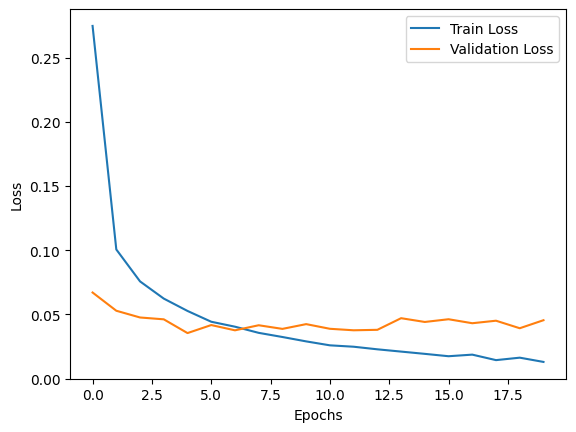

In [16]:
from torch.optim import Adam
import matplotlib.pyplot as plt

# Training function
def train_model(model, train_loader, val_loader, epochs=20, lr=0.001):
    optimizer = Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()
    train_loss, val_loss = [], []
    
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for images, labels in train_loader:
            optimizer.zero_grad()
            output = model(images)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        train_loss.append(running_loss / len(train_loader))
        
        # Validation loss
        model.eval()
        val_running_loss = 0.0
        with torch.no_grad():
            for images, labels in val_loader:
                output = model(images)
                loss = criterion(output, labels)
                val_running_loss += loss.item()
        val_loss.append(val_running_loss / len(val_loader))
        
        print(f"Epoch {epoch+1}/{epochs} - Train Loss: {train_loss[-1]:.4f}, Val Loss: {val_loss[-1]:.4f}")
    return train_loss, val_loss

# Initialize model, train and validate
device = torch.device("cpu")
model = CNN().to(device)
train_loss, val_loss = train_model(model, train_loader, val_loader)

# Plot losses
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/20 - Train Loss: 2.3099, Val Loss: 2.3026
Epoch 2/20 - Train Loss: 2.3019, Val Loss: 2.3041
Epoch 3/20 - Train Loss: 2.3022, Val Loss: 2.3024
Epoch 4/20 - Train Loss: 2.3018, Val Loss: 2.3035
Epoch 5/20 - Train Loss: 2.3023, Val Loss: 2.3019
Epoch 6/20 - Train Loss: 2.3019, Val Loss: 2.3033
Epoch 7/20 - Train Loss: 2.3021, Val Loss: 2.3025
Epoch 8/20 - Train Loss: 2.3021, Val Loss: 2.3024
Epoch 9/20 - Train Loss: 2.3020, Val Loss: 2.3020
Epoch 10/20 - Train Loss: 2.3020, Val Loss: 2.3020
Epoch 11/20 - Train Loss: 2.3022, Val Loss: 2.3024
Epoch 12/20 - Train Loss: 2.3019, Val Loss: 2.3021
Epoch 13/20 - Train Loss: 2.3020, Val Loss: 2.3022
Epoch 14/20 - Train Loss: 2.3021, Val Loss: 2.3032
Epoch 15/20 - Train Loss: 2.3020, Val Loss: 2.3027
Epoch 16/20 - Train Loss: 2.3020, Val Loss: 2.3028
Epoch 17/20 - Train Loss: 2.3021, Val Loss: 2.3024
Epoch 18/20 - Train Loss: 2.3020, Val Loss: 2.3032
Epoch 19/20 - Train Loss: 2.3020, Val Loss: 2.3024
Epoch 20/20 - Train Loss: 2.3021, Val Lo

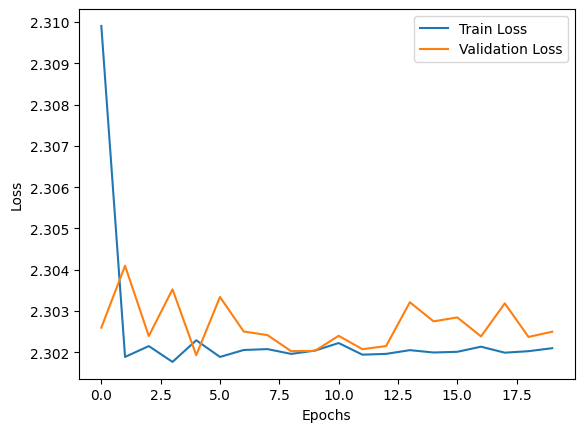

In [ ]:
from torch.optim import Adam
import matplotlib.pyplot as plt

# Training function
def train_model(model, train_loader, val_loader, epochs=20, lr=0.01):
    optimizer = Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()
    train_loss, val_loss = [], []
    
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for images, labels in train_loader:
            optimizer.zero_grad()
            output = model(images)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        train_loss.append(running_loss / len(train_loader))
        
        # Validation loss
        model.eval()
        val_running_loss = 0.0
        with torch.no_grad():
            for images, labels in val_loader:
                output = model(images)
                loss = criterion(output, labels)
                val_running_loss += loss.item()
        val_loss.append(val_running_loss / len(val_loader))
        
        print(f"Epoch {epoch+1}/{epochs} - Train Loss: {train_loss[-1]:.4f}, Val Loss: {val_loss[-1]:.4f}")
    return train_loss, val_loss

# Initialize model, train and validate
device = torch.device("cpu")
model = CNN().to(device)
train_loss, val_loss = train_model(model, train_loader, val_loader)

# Plot losses
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate on test data
def evaluate_model(model, test_loader):
    model.eval()
    y_true, y_pred = [], []
    with torch.no_grad():
        for images, labels in test_loader:
            output = model(images)
            _, predicted = torch.max(output, 1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())
    print("Classification Report:\n", classification_report(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

evaluate_model(model, test_loader)


Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       0.99      1.00      1.00      1135
           2       0.99      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       1.00      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Confusion Matrix:
 [[ 976    0    0    0    1    0    2    0    0    1]
 [   0 1130    2    1    0    0    0    2    0    0]
 [   0    0 1027    1    0    0    0    4    0    0]
 [   0    0    1 1003    0    5    0   

In [20]:
# Transform: normalize and convert to tensor, then repeat channels
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),  # Normalize grayscale
    transforms.Lambda(lambda x: x.repeat(3, 1, 1))  # Repeat single channel to 3 channels
])

# Load MNIST
mnist_train = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
mnist_test = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Split training into training and validation
train_size = int(0.8 * len(mnist_train))
val_size = len(mnist_train) - train_size
train_data, val_data = random_split(mnist_train, [train_size, val_size])

# DataLoaders
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
val_loader = DataLoader(val_data, batch_size=64, shuffle=False)
test_loader = DataLoader(mnist_test, batch_size=64, shuffle=False)


In [21]:
from torchvision.models import resnet18

# Load a pre-trained ResNet18 model
pretrained_model = resnet18(pretrained=True)

# Modify the final layer for MNIST
pretrained_model.fc = nn.Linear(pretrained_model.fc.in_features, 10)

# Transfer the model to the device
pretrained_model = pretrained_model.to(device)

# Training with Transfer Learning
train_loss, val_loss = train_model(pretrained_model, train_loader, val_loader)

# Evaluate the pre-trained model
evaluate_model(pretrained_model, test_loader)


Epoch 1/20 - Train Loss: 0.1368, Val Loss: 0.0665
Epoch 2/20 - Train Loss: 0.0619, Val Loss: 0.0526
Epoch 3/20 - Train Loss: 0.0468, Val Loss: 0.0428


KeyboardInterrupt: 